# Exploratory Analysis for PS1

Instructions at: https://github.com/UC-MACSS/persp-research_Spr18/blob/master/assignments/ps1.md

In [158]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [143]:
keepers = ['dob_mm', 'dob_tt', 'dob_wk', 'mager',
           'meduc', 'fagecomb', 
           'feduc', 'priorlive', 'previs']

df = pd.read_csv('natl2016.csv', usecols = keepers)


In [144]:
df_keep = df

In [4]:
# numeric are dob_tt, mager, fagecomb, priorlive, previs
num_results = []
for i in ['dob_tt', 'mager', 'fagecomb', 'priorlive', 'previs']:
    result_dict = {}
    result_dict['mean'] = np.mean(df_keep[i])
    result_dict['std'] = np.std(df_keep[i])
    result_dict['max'] = np.max(df_keep[i])
    result_dict['min'] = np.min(df_keep[i])
    num_results.append((i, result_dict))

# ordinal are dob_mm, dob_wk, meduc, feduc
ord_results = []
from collections import Counter
for i in ['dob_mm', 'dob_wk', 'meduc', 'feduc']:
    result_dict = {}
    c = Counter(df_keep[i])
    result_dict['mode'] = c.most_common()[0]
    result_dict['counts'] = c.items()
    ord_results.append((i,result_dict))



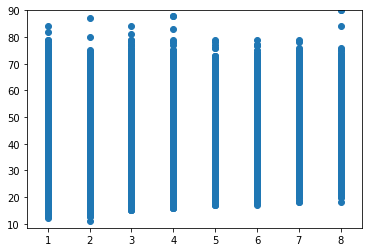

In [76]:
plt.scatter(df.feduc, df.fagecomb)
plt.ylim(8.5, 90)
plt.xlim(0.5, 8.5);

In [5]:

df_sample = df_keep.sample(10000)
df_sample = df_sample[df_sample.fagecomb < 89]
df_sample = df_sample[df_sample.feduc < 9]
lookup = {1: '< Grade 8', 2: 'Grade 9 - 12, no Diploma', 3: 'High School Graduate',
                                         4: 'Some College', 5: 'Associate Degree', 6: 'Bachelor', 
                                          7: 'Master', 8:'Doctorate'}
lookup_list = ['< Grade 8', 'Grade 9 - 12,\nno Diploma','High School Graduate',
                                         'Some College', 'Associate Degree', 'Bachelor', 
                                          'Master','Doctorate']
#educ = [lookup[i] for i in df_sample.feduc]
shifted = [i -1 for i in df_sample.feduc]
df_sample["Father's Education"] = pd.Categorical.from_codes(shifted, lookup_list, ordered = True)
df_sample["Father's Age"] = df_sample.fagecomb

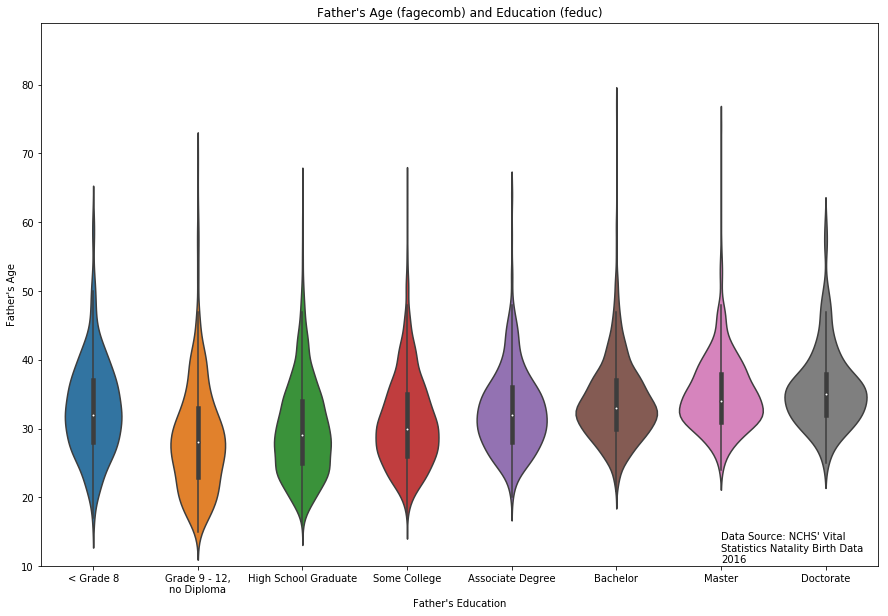

In [6]:
plt.figure(figsize=(15,10))
sns.violinplot(x="Father's Education", y="Father's Age", data=df_sample, size = 3)
plt.title("Father's Age (fagecomb) and Education (feduc)")
plt.ylim(10,89)
plt.text(6, 10.5, "Data Source: NCHS' Vital \nStatistics Natality Birth Data \n2016")
plt.savefig('Fathersageandeducation.png')

In [7]:

df_sample = df_keep.sample(10000)
df_sample = df_sample[df_sample.fagecomb < 89]
df_sample = df_sample[df_sample.meduc < 9]
lookup = {1: '< Grade 8', 2: 'Grade 9 - 12, no Diploma', 3: 'High School Graduate',
                                         4: 'Some College', 5: 'Associate Degree', 6: 'Bachelor', 
                                          7: 'Master', 8:'Doctorate'}
lookup_list = ['< Grade 8', 'Grade 9 - 12,\nno Diploma','High School Graduate',
                                         'Some College', 'Associate Degree', 'Bachelor', 
                                          'Master','Doctorate']
#educ = [lookup[i] for i in df_sample.feduc]
shifted = [i -1 for i in df_sample.meduc]
df_sample["Mother's Education"] = pd.Categorical.from_codes(shifted, lookup_list, ordered = True)
df_sample["Father's Age"] = df_sample.fagecomb

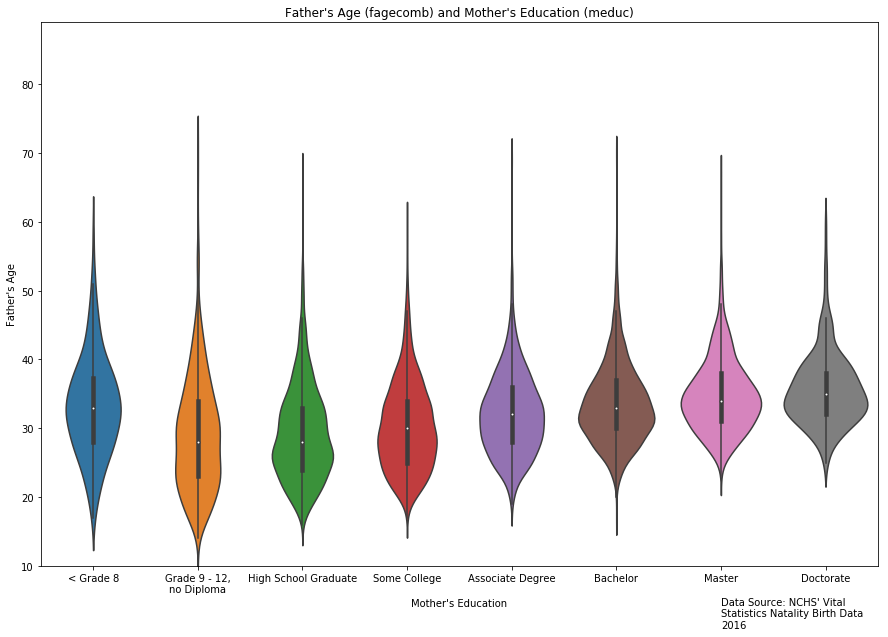

In [9]:
plt.figure(figsize=(15,10))
sns.violinplot(x="Mother's Education", y="Father's Age", data=df_sample, size = 3)
plt.title("Father's Age (fagecomb) and Mother's Education (meduc)")
plt.ylim(10,89)
plt.text(6, 1, "Data Source: NCHS' Vital \nStatistics Natality Birth Data \n2016")
plt.savefig('Fathersageandmotherseducation.png')

In [10]:
df_sample = df_keep.sample(10000)
df_sample = df_sample[df_sample.mager < 89]
df_sample = df_sample[df_sample.meduc < 9]
lookup = {1: '< Grade 8', 2: 'Grade 9 - 12, no Diploma', 3: 'High School Graduate',
                                         4: 'Some College', 5: 'Associate Degree', 6: 'Bachelor', 
                                          7: 'Master', 8:'Doctorate'}
lookup_list = ['< Grade 8', 'Grade 9 - 12,\nno Diploma','High School Graduate',
                                         'Some College', 'Associate Degree', 'Bachelor', 
                                          'Master','Doctorate']
educ = [lookup[i] for i in df_sample.meduc]
shifted = [i -1 for i in df_sample.meduc]
df_sample["Mother's Education"] = pd.Categorical.from_codes(shifted, lookup_list, ordered = True)
df_sample["Mother's Age"] = df_sample.mager

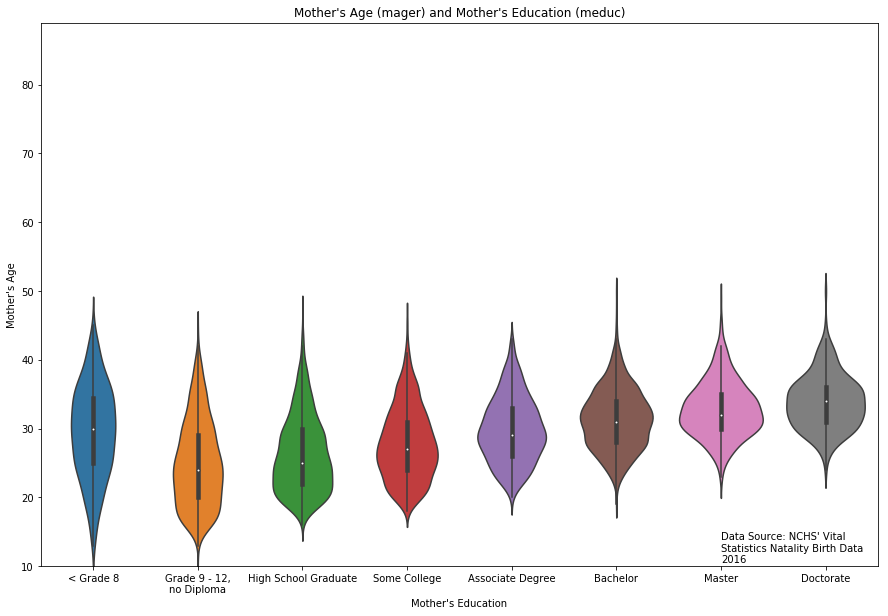

In [11]:
plt.figure(figsize=(15,10))
sns.violinplot(x="Mother's Education", y="Mother's Age", data=df_sample, size = 3)
plt.title("Mother's Age (mager) and Mother's Education (meduc)")
plt.ylim(10,89)
plt.text(6, 10.5, "Data Source: NCHS' Vital \nStatistics Natality Birth Data \n2016")
plt.savefig('Mothersageandeducation.png')

In [12]:
df_sample = df_keep.sample(10000)
df_sample = df_sample[df_sample.dob_mm < 13]
df_sample = df_sample[df_sample.dob_mm > 0]
df_sample = df_sample[df_sample.meduc < 9]
lookup = {1: '< Grade 8', 2: 'Grade 9 - 12, no Diploma', 3: 'High School Graduate',
                                         4: 'Some College', 5: 'Associate Degree', 6: 'Bachelor', 
                                          7: 'Master', 8:'Doctorate'}
lookup_list = ['< Grade 8', 'Grade 9 - 12,\nno Diploma','High School Graduate',
                                         'Some College', 'Associate Degree', 'Bachelor', 
                                          'Master','Doctorate']
educ = [lookup[i] for i in df_sample.meduc]
shifted = [i -1 for i in df_sample.meduc]
df_sample["Mother's Education"] = pd.Categorical.from_codes(shifted, lookup_list, ordered = True)
df_sample["Birth Month"] = df_sample.dob_mm

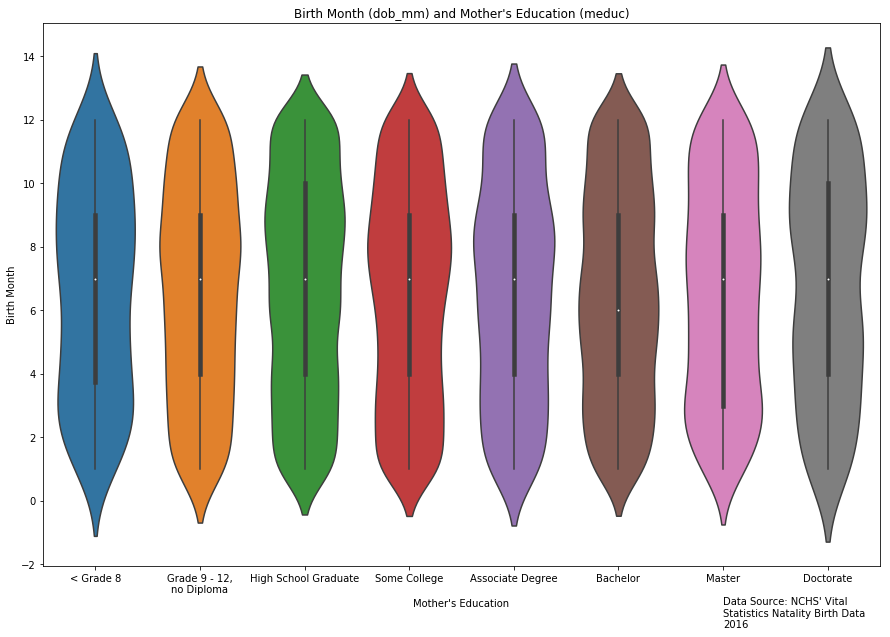

In [13]:
plt.figure(figsize=(15,10))
sns.violinplot(x="Mother's Education", y="Birth Month", data=df_sample, size = 3)
plt.title("Birth Month (dob_mm) and Mother's Education (meduc)")
#plt.ylim(10,60)
plt.text(6, -4, "Data Source: NCHS' Vital \nStatistics Natality Birth Data \n2016")
plt.savefig('Birthmonthandeducation.png')

In [14]:
df_sample = df_keep.sample(10000)
df_sample = df_sample[df_sample.dob_wk < 8]
df_sample = df_sample[df_sample.meduc < 9]
lookup = {1: '< Grade 8', 2: 'Grade 9 - 12, no Diploma', 3: 'High School Graduate',
                                         4: 'Some College', 5: 'Associate Degree', 6: 'Bachelor', 
                                          7: 'Master', 8:'Doctorate'}
lookup_list = ['< Grade 8', 'Grade 9 - 12,\nno Diploma','High School Graduate',
                                         'Some College', 'Associate Degree', 'Bachelor', 
                                          'Master','Doctorate']
educ = [lookup[i] for i in df_sample.meduc]
shifted = [i -1 for i in df_sample.meduc]
df_sample["Mother's Education"] = pd.Categorical.from_codes(shifted, lookup_list, ordered = True)
df_sample["Birth Day"] = df_sample.dob_wk

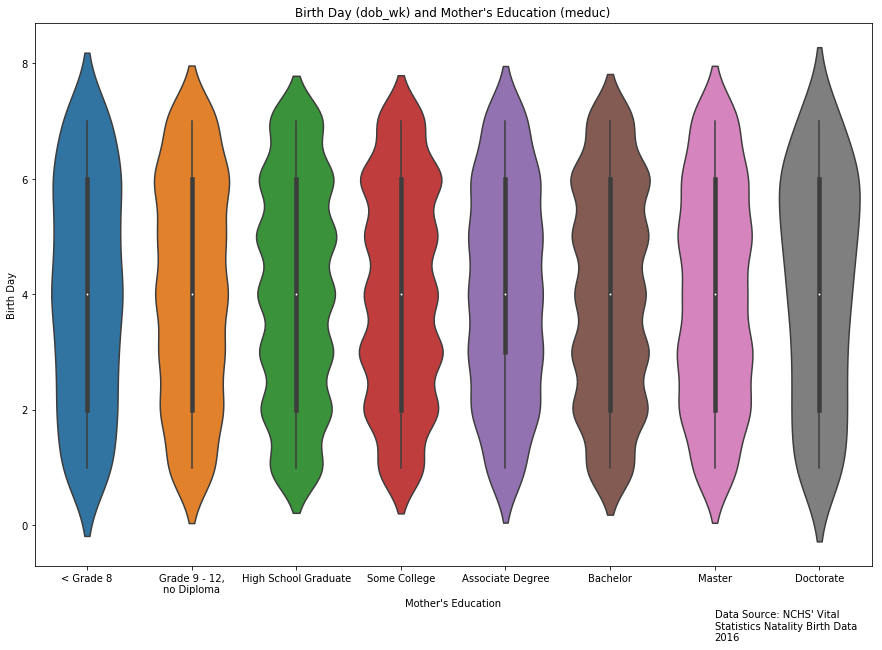

In [16]:
plt.figure(figsize=(15,10))
sns.violinplot(x="Mother's Education", y="Birth Day", data=df_sample, size = 3)
plt.title("Birth Day (dob_wk) and Mother's Education (meduc)")
#plt.ylim(10,60)
plt.text(6, -2, "Data Source: NCHS' Vital \nStatistics Natality Birth Data \n2016")
plt.savefig('Birthdayandeducation.png')

In [17]:
df_sample = df_keep.sample(10000)
df_sample = df_sample[df_sample.dob_tt < 2400]
df_sample = df_sample[df_sample.meduc < 9]
lookup = {1: '< Grade 8', 2: 'Grade 9 - 12, no Diploma', 3: 'High School Graduate',
                                         4: 'Some College', 5: 'Associate Degree', 6: 'Bachelor', 
                                          7: 'Master', 8:'Doctorate'}
lookup_list = ['< Grade 8', 'Grade 9 - 12,\nno Diploma','High School Graduate',
                                         'Some College', 'Associate Degree', 'Bachelor', 
                                          'Master','Doctorate']
educ = [lookup[i] for i in df_sample.meduc]
shifted = [i -1 for i in df_sample.meduc]
df_sample["Mother's Education"] = pd.Categorical.from_codes(shifted, lookup_list, ordered = True)
df_sample["Birth Time"] = df_sample.dob_tt

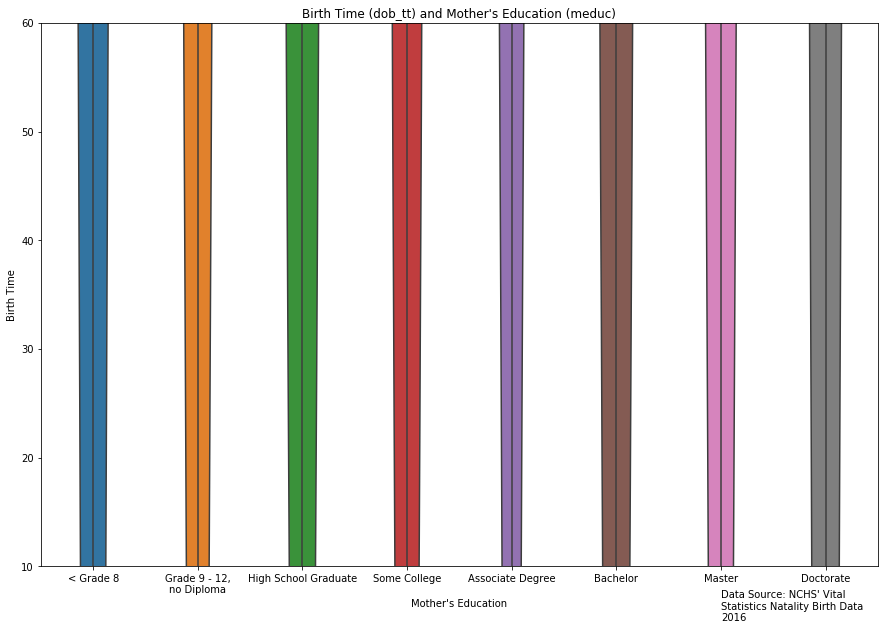

In [19]:
plt.figure(figsize=(15,10))
sns.violinplot(x="Mother's Education", y="Birth Time", data=df_sample, size = 3)
plt.title("Birth Time (dob_tt) and Mother's Education (meduc)")
plt.ylim(10,60)
plt.text(6, 5, "Data Source: NCHS' Vital \nStatistics Natality Birth Data \n2016")
plt.savefig('Birthtimeandeducation.png')

In [14]:
max(df_keep.priorlive)

99

In [155]:
df_sample = df_keep.sample(10000)
df_sample = df_sample[df_sample.priorlive < 31]
df_sample = df_sample[df_sample.meduc < 9]
lookup = {1: '< Grade 8', 2: 'Grade 9 - 12, no Diploma', 3: 'High School Graduate',
                                         4: 'Some College', 5: 'Associate Degree', 6: 'Bachelor', 
                                          7: 'Master', 8:'Doctorate'}
lookup_list = ['< Grade 8', 'Grade 9 - 12,\nno Diploma','High School Graduate',
                                         'Some College', 'Associate Degree', 'Bachelor', 
                                          'Master','Doctorate']
educ = [lookup[i] for i in df_sample.meduc]
shifted = [i -1 for i in df_sample.meduc]
df_sample["Mother's Education"] = pd.Categorical.from_codes(shifted, lookup_list, ordered = True)
df_sample["Prior Live"] = df_sample.priorlive

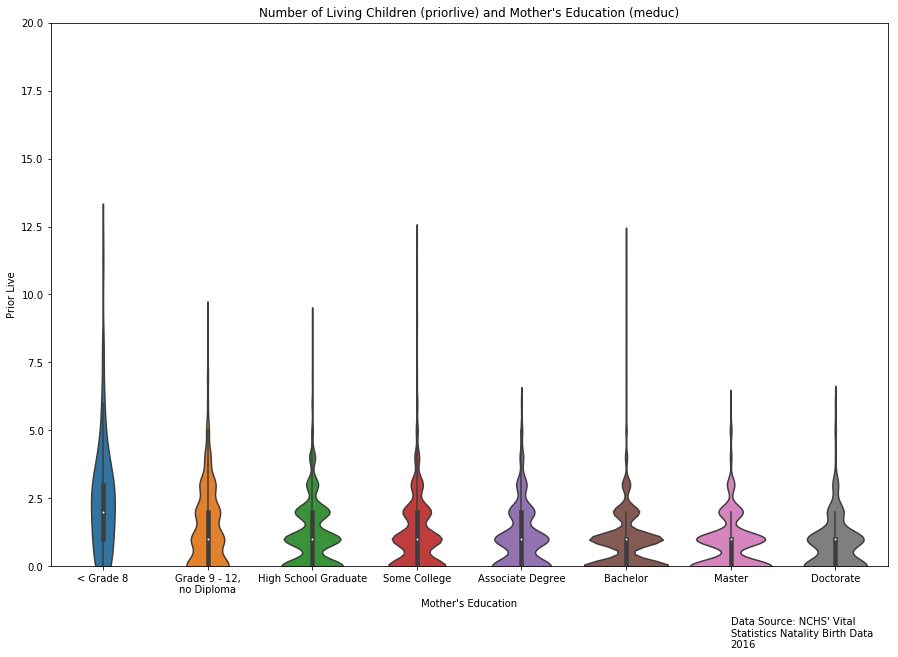

In [156]:
plt.figure(figsize=(15,10))
sns.violinplot(x="Mother's Education", y="Prior Live", data=df_sample, size = 3)
plt.title("Number of Living Children (priorlive) and Mother's Education (meduc)")
plt.ylim(0,20)
plt.text(6, -3, "Data Source: NCHS' Vital \nStatistics Natality Birth Data \n2016")
plt.savefig('Priorliveandeducation.png')

In [45]:
df_sample = df_keep.sample(1000)
#df_sample = df_sample[df_sample.priorlive < 31]
df_sample = df_sample[df_sample.meduc < 9]
lookup = {1: '< Grade 8', 2: 'Grade 9 - 12, no Diploma', 3: 'High School Graduate',
                                         4: 'Some College', 5: 'Associate Degree', 6: 'Bachelor', 
                                          7: 'Master', 8:'Doctorate'}
lookup_list = ['< Grade 8', 'Grade 9 - 12,\nno Diploma','High School Graduate',
                                         'Some College', 'Associate Degree', 'Bachelor', 
                                          'Master','Doctorate']

shifted = [i -1 for i in df_sample.meduc]
df_sample["Mother's Education"] = pd.Categorical.from_codes(shifted, lookup_list, ordered = True)

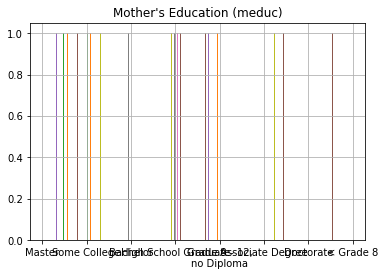

In [46]:
#plt.figure(figsize=(15,10))
df_sample["Mother's Education"].hist()
plt.title("Mother's Education (meduc)")
#plt.text(6, 1900, "Data Source: NCHS' Vital \nStatistics Natality Birth Data \n2016")
plt.savefig('Mothereducationonly.png')

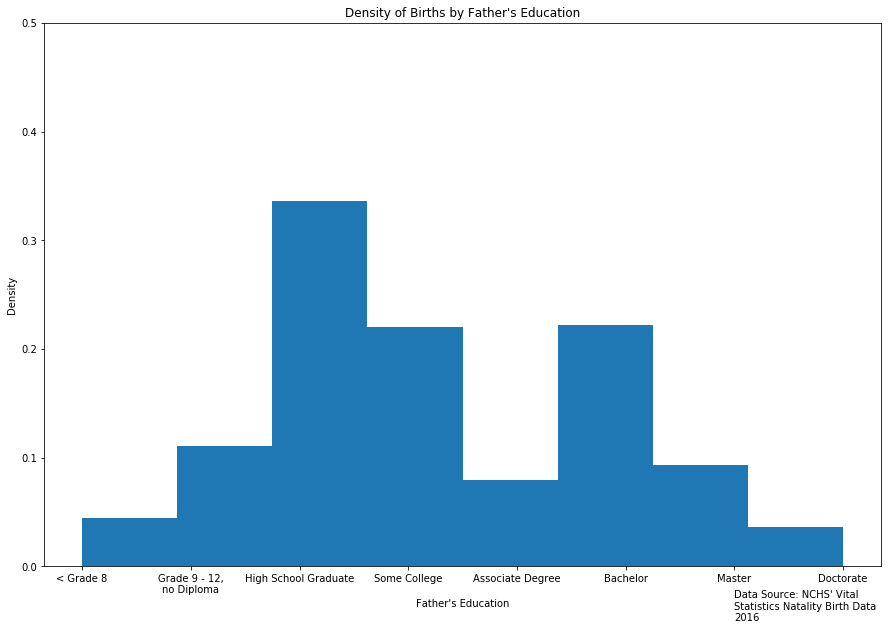

In [118]:
# father education attainment

df_sample = df_keep.sample(10000)
lookup_list = ['< Grade 8', 'Grade 9 - 12,\nno Diploma','High School Graduate',
                                         'Some College', 'Associate Degree', 'Bachelor', 
                                          'Master','Doctorate']
shift_sort = list(df_sample.feduc[df_sample.feduc < 9])
shift_sort.sort()
shift_sort = [i -1 for i in shift_sort]
ddf = pd.Categorical.from_codes(shift_sort, lookup_list, ordered = True)
plt.figure(figsize=(15,10))
plt.hist(list(ddf), bins = 8, density = True)
plt.title("Density of Births by Father's Education")
plt.xlabel("Father's Education")
plt.ylabel("Density")
plt.ylim(0, .5)
plt.text(6, -0.05, "Data Source: NCHS' Vital \nStatistics Natality Birth Data \n2016")
plt.savefig('Fathereducationattainment.png')



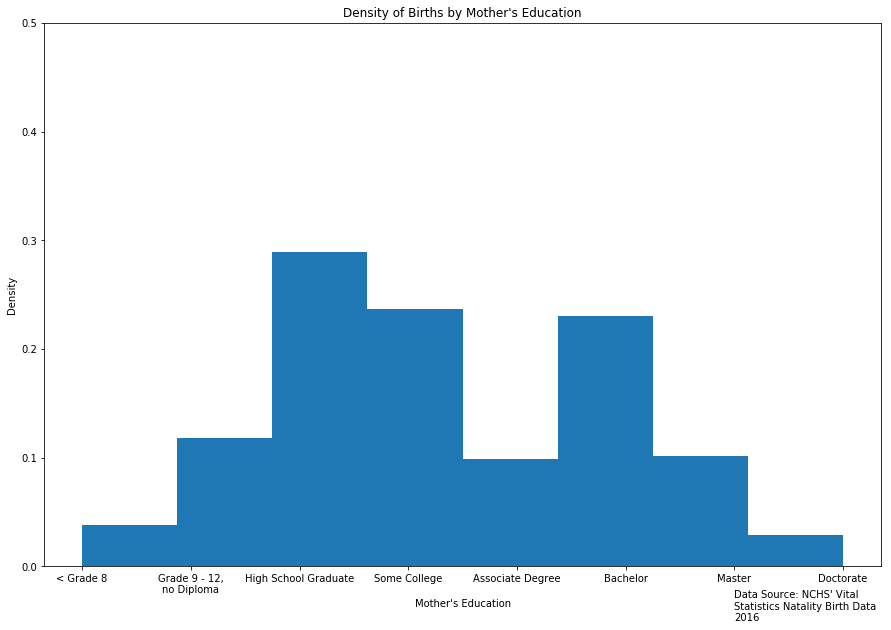

In [119]:
# mothers education attainment

df_sample = df_keep.sample(10000)
lookup_list = ['< Grade 8', 'Grade 9 - 12,\nno Diploma','High School Graduate',
                                         'Some College', 'Associate Degree', 'Bachelor', 
                                          'Master','Doctorate']
shift_sort = list(df_sample.meduc[df_sample.meduc < 9])
shift_sort.sort()
shift_sort = [i -1 for i in shift_sort]
ddf = pd.Categorical.from_codes(shift_sort, lookup_list, ordered = True)
plt.figure(figsize=(15,10))
plt.hist(list(ddf), bins = 8, density = True)
plt.title("Density of Births by Mother's Education")
plt.xlabel("Mother's Education")
plt.ylabel("Density")
plt.ylim(0, .5)
plt.text(6, -0.05, "Data Source: NCHS' Vital \nStatistics Natality Birth Data \n2016")
plt.savefig('Mothereducationattainment.png')


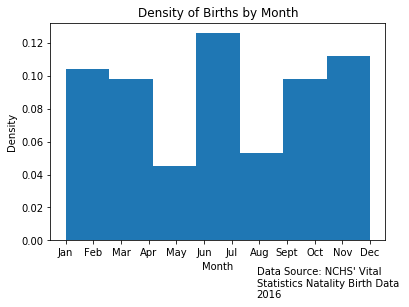

In [126]:
df_sample = df_keep.sample(1000)
lookup_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul','Aug','Sept','Oct', 'Nov','Dec']
shift_sort = list(df_sample.dob_mm)
shift_sort.sort()
shift_sort = [i -1 for i in shift_sort]
ddf = pd.Categorical.from_codes(shift_sort, lookup_list, ordered = True)
plt.hist(list(ddf), bins = 7, density = True)
plt.title("Density of Births by Month")
plt.xlabel("Month")
plt.ylabel("Density")
plt.text(6.9, -0.035, "Data Source: NCHS' Vital \nStatistics Natality Birth Data \n2016")
plt.savefig('Birthbymonth.png')

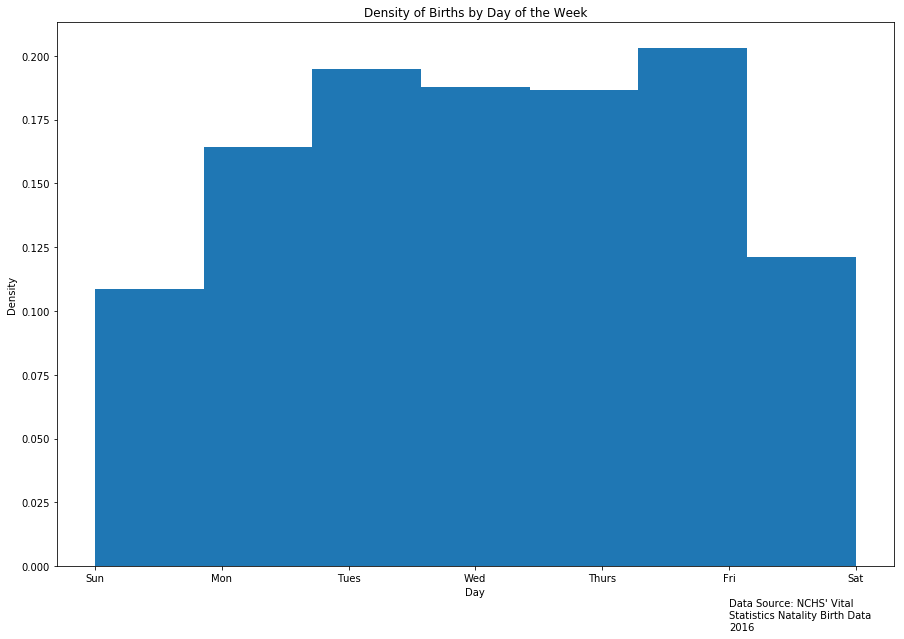

In [151]:
df_sample = df_keep.sample(1000)
lookup_list = ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']
shift_sort = list(df_sample.dob_wk)
shift_sort.sort()
shift_sort = [i -1 for i in shift_sort]
ddf = pd.Categorical.from_codes(shift_sort, lookup_list, ordered = True)
plt.figure(figsize=(15,10))
plt.hist(list(ddf), bins = 7, density = True)
plt.title("Density of Births by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Density")
plt.text(5, -0.025, "Data Source: NCHS' Vital \nStatistics Natality Birth Data \n2016")
plt.savefig('Birthbyday.png')

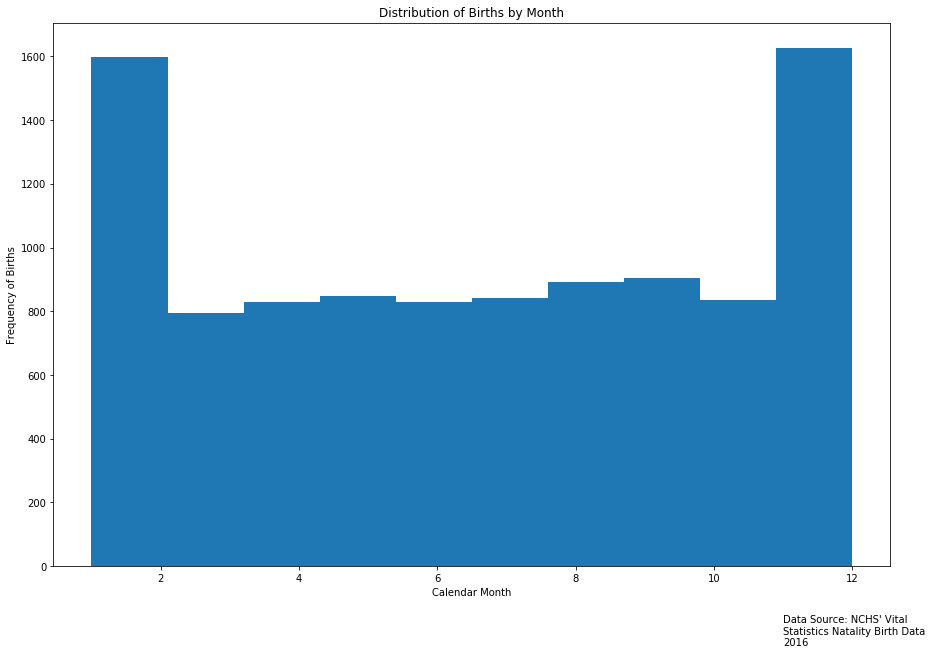

In [154]:
# birth month
df_sample = df_keep.sample(10000)
df_sample = df_sample[df_sample.dob_mm < 13]
plt.figure(figsize=(15,10))
plt.hist(df_sample.dob_mm)
plt.title("Distribution of Births by Month")
plt.xlabel("Calendar Month")
plt.ylabel("Frequency of Births")
plt.text(11, -250, "Data Source: NCHS' Vital \nStatistics Natality Birth Data \n2016")
plt.savefig('Birthbymonth.png')